In [44]:
!pip install dython

In [45]:
import pandas as pd;

import numpy as np;

from sklearn.preprocessing import LabelEncoder;
from sklearn.decomposition import PCA;

import matplotlib.pyplot as plt;

import seaborn as sns;

from sklearn import preprocessing;
from sklearn.preprocessing import OneHotEncoder;
from sklearn.linear_model import LogisticRegression;
from sklearn.model_selection import train_test_split;

from dython import nominal;

# configs:
pd.options.display.max_columns = None;

In [46]:
# "adult.data" file.
inputDataURL = "https://raw.githubusercontent.com/Aditya-163/MLDA-1-Project-1/main/Data/adult.data"; 
# "adult.test" file.
testDataURL = "https://raw.githubusercontent.com/Aditya-163/MLDA-1-Project-1/main/Data/adult.test";

# Attributes in the data.
allAttrs = ["age","workclass","fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","income"]; 
xAttrs = ["age","workclass","fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country"];
yAttrs = ["income"];

# Numerical Attributes:
numXAttrs = ["age","fnlwgt","education-num","capital-gain","capital-loss","hours-per-week"];

# Nominal Attributes:
nominalXAttrs = ["workclass","education","marital-status","occupation","relationship","race","sex","native-country"];

#Reading The Data

In [47]:
# Training Data.
inputData = pd.read_csv(inputDataURL, names=allAttrs, na_values=" ?");
inputData = inputData.dropna();

# Test Data.
testData = pd.read_csv(testDataURL, names=allAttrs, na_values=" ?");
testData = testData.dropna();

# Concataneted Data
data = pd.concat([inputData,testData]);

data = data.replace(to_replace =[" <=50K"," <=50K."], value ="<=50K");
data = data.replace(to_replace =[" >50K"," >50K."], value =">50K");

#Normalizing The Data

In [48]:
data[numXAttrs] = preprocessing.MinMaxScaler().fit_transform(data[numXAttrs]);

#Splitting The Inputs and Outputs from The Data

In [49]:
X = data[xAttrs];
X.reset_index(drop=True, inplace=True);

Y = data[yAttrs];
Y.reset_index(drop=True, inplace=True);

#PCA on Numerical Attributes

In [50]:
Ypca = Y;

pca = PCA(0.90);
pca.fit(X[numXAttrs]);
XDimReduced = pca.transform(X[numXAttrs]);

Xpca = pd.DataFrame({'PC1':XDimReduced[:,0], 'PC2':XDimReduced[:,1], 'PC3':XDimReduced[:,2], 'PC4':XDimReduced[:,3], 'PC5':XDimReduced[:,4]});

Xpca = pd.concat([X,Xpca],axis=1);
XpcaAttrs = nominalXAttrs + ["PC1","PC2","PC3","PC4","PC5"];
Xpca = Xpca[XpcaAttrs];

#Covariance Between Nominal Variables

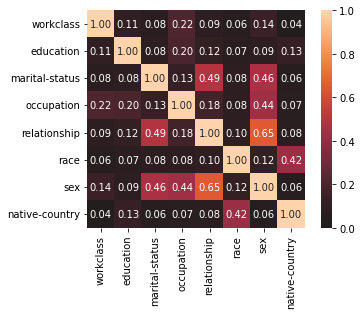

In [51]:
XWithNominalAttrs = X[nominalXAttrs];
correlationMatrixForNominalData = nominal.associations(XWithNominalAttrs, nominal_columns='all'); # Uses Correlation Ratio for finding the correlation!

# sex (gender) and relationship have a correlation of 0.65, hence eliminating relationship attribute from our data!
XpcaAttrs.remove('relationship');
Xpca = Xpca[XpcaAttrs];
XpcaAttrs.append('relationship');

# Ref: https://github.com/shakedzy/dython/issues/2

# Encoding Nominal Attributes in Original Data:

In [52]:
X = pd.get_dummies(X,drop_first=True);
Y = pd.get_dummies(Y,drop_first=True);
X.reset_index(drop=True, inplace=True);
Y.reset_index(drop=True, inplace=True);

Xpca = pd.get_dummies(Xpca,drop_first=True);
Ypca = pd.get_dummies(Ypca,drop_first=True);
Xpca.reset_index(drop=True, inplace=True);
Ypca.reset_index(drop=True, inplace=True);

# Logistic Regression Based Binary Classification (Without PCA and Correlation): 

In [53]:
# For [X, Y]:
print("Actual Output classes are:");
print(Y);
print("-------------------------------------------");

# Binary Classification Using the Logistic Regression:
XTrain, XTest, YTrain, YTest = train_test_split(X, Y, test_size=0.33, random_state=0);
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression();
logisticRegr.fit(XTrain, YTrain);

acc = logisticRegr.score(XTest, YTest);

# Computing The Accuracy of The Classification:
print("The accuracy of the Binary Classification is:");
print(acc);

Actual Output classes are:
       income_>50K
0                0
1                0
2                0
3                0
4                0
...            ...
45217            0
45218            0
45219            0
45220            0
45221            1

[45222 rows x 1 columns]
-------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The accuracy of the Binary Classification is:
0.8482310372554275


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# Logistic Regression Based Binary Classification (With PCA and Correlation):

In [54]:
# For [Xpca, Ypca]:
print("Actual Output classes after PCA and Coorelation analysis are:");
print(Ypca);
print("-------------------------------------------");

# Binary Classification Using the Logistic Regression:
XPcaTrain, XPcaTest, YPcaTrain, YPcaTest = train_test_split(Xpca, Ypca, test_size=0.33, random_state=0);
# all parameters not specified are set to their defaults
logisticRegrPca = LogisticRegression();
logisticRegrPca.fit(XPcaTrain, YPcaTrain);

accPca = logisticRegrPca.score(XPcaTest, YPcaTest);

# Computing The Accuracy of The Classification:
print("The accuracy of the Binary Classification is:");
print(accPca);

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Actual Output classes after PCA and Coorelation analysis are:
       income_>50K
0                0
1                0
2                0
3                0
4                0
...            ...
45217            0
45218            0
45219            0
45220            0
45221            1

[45222 rows x 1 columns]
-------------------------------------------
The accuracy of the Binary Classification is:
0.8466898954703833


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
